In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation


In [21]:
def possesion(path, possesion_type, interval_length):
    if possesion_type not in ["BallPossession","Territorial","TerritorialThird"]:
        raise ValueError(f"possesion_type must be equal to one of BallPossession, Territorial or TerritorialThird")

    if interval_length not in [5,15,45]:
        raise ValueError(f"interval_length must be equal to one of 5, 15 or 45")


    file=ET.parse(path)
    interval_poss = {}

    root = file.getroot()

    away_team = root.attrib.get("away_team_name")
    home_team = root.attrib.get("home_team_name")

    for possession_wave in root.findall(f".//PossessionWave[@Type='{possesion_type}']"):
        for interval_length in possession_wave.findall(f".//IntervalLength[@Type='{interval_length}']"):
            for interval in interval_length.findall("Interval"):
                # Create a new team_poss dictionary for each interval
                if possesion_type != "TerritorialThird":
                    team_poss = {
                        away_team: float(interval.find('Away').text),
                        home_team: float(interval.find('Home').text)
                    }
                else:
                    team_poss = {
                        away_team: float(interval.find('Away').text),
                        home_team: float(interval.find('Home').text),
                        'middle': float(interval.find('Middle').text)
                    }
                interval_type = interval.attrib.get("Type")
                interval_poss[interval_type] = team_poss

    poss=pd.DataFrame.from_dict(data=interval_poss)

    return poss

In [22]:
test=possesion('C:/Users/Felix/Desktop/Máster  BD Deporte/Módulo 7 - Proveedores de Datos Deportivos/f28/f28-23-2019-1074825-eventdetails.xml', "TerritorialThird",5)
test

,0-5,6-10,11-15,16-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,71-75,76-80,81-85,86-90
Espanyol,34.3,30.3,50.8,20.4,50.0,7.8,25.7,28.6,3.0,63.0,20.3,46.3,25.0,29.3,18.0,23.4,35.0,42.1
Alavés,11.8,24.2,8.5,14.8,3.8,26.6,11.4,12.5,48.5,6.5,22.0,17.1,28.6,15.5,34.0,27.7,12.5,22.8
middle,53.9,45.5,40.7,64.8,46.2,65.6,62.9,58.9,48.5,30.5,57.7,36.6,46.4,55.2,48.0,48.9,52.5,35.1


In [13]:
def possesion_evolution(df,animated=True):

    fig, ax = plt.subplots()
    t = possesion.columns.tolist()

    team_0=possesion.index.tolist()[0]
    team_1=possesion.index.tolist()[1]

    l1=possesion.loc[team_0,t]
    l2= possesion.loc[team_1,t]

    if animated==False:
        
        line1 = ax.plot(t, l1, label=team_0)[0]
        line2 = ax.plot(t, l2, label=team_1)[0]
        ax.set( xlim=[0, len(t)], ylim=[0, 100],xlabel='Interval time (mins)', ylabel='Possesion')
        ax.legend()
    
    else:
        line1 = ax.plot(t[0], l1[0], label=team_0)[0]
        line2 = ax.plot(t[0], l2[0], label=team_1)[0]
        ax.set( xlim=[0, len(t)], ylim=[0, 100],xlabel='Interval time (mins)', ylabel='Possesion')
        ax.legend()

        def update(frame):
            # for each frame, update the data stored on each artist.
            # update the line1 plot:
            line1.set_xdata(t[:frame])
            line1.set_ydata(l1[:frame])
            # update the line2 plot:
            line2.set_xdata(t[:frame])
            line2.set_ydata(l2[:frame])
            return (line1, line2)


        ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t), interval=500, repeat_delay=4000)

    plt.show()

C:\Users\Felix\AppData\Local\Temp\ipykernel_21072\3382802042.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line1 = ax.plot(t[0], l1[0], label=team_0)[0]
C:\Users\Felix\AppData\Local\Temp\ipykernel_21072\3382802042.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  line2 = ax.plot(t[0], l2[0], label=team_1)[0]


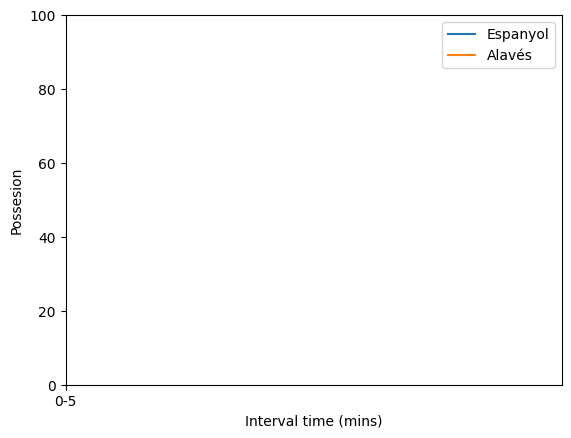

c:\Users\Felix\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [15]:
possesion_evolution(possesion)